In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

%matplotlib inline

In [4]:
df_master = pd.read_pickle('GTD_df.p')

In [212]:
# No resample random Forest
row_mask9 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['attacktype2'] != 9) & # exclude unknown attack types
            (df_master['attacktype3'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['weaptype2'] != 13) &  # exclude unknown weapons
            (df_master['weaptype3'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['targtype2'] != 20) &  # exclude unknown targets
            (df_master['targtype3'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features9 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat9 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels9 = ['gname']

#subset on mask and features
df_m9 = pd.get_dummies(df_master[labels9 + features9 + features_cat9][row_mask9].dropna(), columns=features_cat9)
#subset number of attack per group
df_m9 = df_m9[df_m9.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X9 = df_m9.iloc[:,1:]
y9 = df_m9.iloc[:,0]

#train test split
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=.25, random_state=42)

#fit Model
cm9 = RandomForestClassifier(n_estimators=100, max_features= None, n_jobs=-1, class_weight='balanced')
cm9.fit(X9_train, y9_train)

#report
print('Number of Attacks:', df_m9.shape[0])
print('Number of Features:', df_m9.shape[1])
print('Number of Groups:', len(y9.unique()))
print('Train Accuracy:', cm9.score(X9_train, y9_train))
print('Test Accuracy:', cm9.score(X9_test, y9_test))
print(classification_report(y9_test, cm9.predict(X9_test)))

Number of Attacks: 8460
Number of Features: 4275
Number of Groups: 117
Train Accuracy: 1.0
Test Accuracy: 0.83829787234
                                                              precision    recall  f1-score   support

                                     Abdullah Azzam Brigades       1.00      0.33      0.50         3
                                      Abu Sayyaf Group (ASG)       0.40      0.29      0.33         7
                    Adan-Abyan Province of the Islamic State       0.40      0.67      0.50         3
                                     Al-Aqsa Martyrs Brigade       0.77      0.77      0.77        13
                                                    Al-Fatah       0.00      0.00      0.00         1
                                       Al-Naqshabandiya Army       0.50      0.25      0.33         4
                                             Al-Nusrah Front       0.54      0.70      0.61        20
                                            Al-Qaida in Iraq   

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [225]:
#Random Forest with resample

row_mask10 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['attacktype2'] != 9) & # exclude unknown attack types
            (df_master['attacktype3'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['weaptype2'] != 13) &  # exclude unknown weapons
            (df_master['weaptype3'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['targtype2'] != 20) &  # exclude unknown targets
            (df_master['targtype3'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features10 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat10 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels10 = ['gname']

#subset on mask and features
df_m10 = pd.get_dummies(df_master[labels10 + features10 + features_cat10][row_mask10].dropna(), columns=features_cat10)
#subset number of attack per group
df_m10 = df_m10[df_m10.groupby('gname')['gname'].transform(len) > 5]

#train test split
train10, test10 = train_test_split(df_m10, test_size=.25, random_state=42, stratify=df_m10['gname'])

# resample
train_res10 = pd.DataFrame()
for group in train10['gname'].unique():
    train_res10 = pd.concat([train_res10,resample(train10[train10['gname']==group], n_samples=350)])
    

#define X and y
X10_train = train_res10.iloc[:,1:]
X10_test = test10.iloc[:,1:]
y10_train = train_res10.iloc[:,0]
y10_test = test10.iloc[:,0]

#fit Model
cm10 = RandomForestClassifier(n_estimators=100, max_features= None, n_jobs=-1, class_weight='balanced')
cm10.fit(X10_train, y10_train)

#report
print('Number of Attacks:', df_m10.shape[0])
print('Number of Features:', df_m10.shape[1])
print('Number of Groups:', len(df_m10['gname'].unique()))
print('Train Accuracy:', cm10.score(X10_train, y10_train))
print('Test Accuracy:', cm10.score(X10_test, y10_test))
print(classification_report(y10_test, cm10.predict(X10_test)))

Number of Attacks: 8460
Number of Features: 4275
Number of Groups: 117
Train Accuracy: 0.99956043956
Test Accuracy: 0.762174940898
                                                              precision    recall  f1-score   support

                                     Abdullah Azzam Brigades       1.00      0.50      0.67         2
                                      Abu Sayyaf Group (ASG)       0.40      0.50      0.44         8
                    Adan-Abyan Province of the Islamic State       0.25      0.50      0.33         2
                                                  Ajnad Misr       0.00      0.00      0.00         1
                                     Al-Aqsa Martyrs Brigade       0.55      0.50      0.52        12
                                                    Al-Fatah       1.00      1.00      1.00         1
                                       Al-Naqshabandiya Army       0.50      0.33      0.40         3
                                             Al-Nusr

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [233]:
def create_hm(X, y, model, country):

    y_hm = y[X[str('country_txt_' + country)] == 1]
    X_hm = X[X[str('country_txt_' + country)] == 1]
    labels = y_hm.value_counts().index
    
    cm = confusion_matrix(y_hm, model.predict(X_hm), labels=labels)
    cm = pd.DataFrame(cm / cm.sum(axis=0, keepdims=True)).fillna(0)
    print('Unique Actual Classes:', len(y_hm.unique()))
    print('Unique Predicted Classes:', len(pd.Series(model.predict(X_hm)).unique()))
    print('Total Test Observations:', len(y_hm))
    
    ax, fig = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(cm, annot=True, cmap='Reds_r', square=True, cbar_kws={"label": "Precision"})
    ax.set_title("Terror Matrix - " + country)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual Label')    
    ax.set_xlabel('Predicted Label')
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.show()


/Users/maliksalam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Unique Actual Classes: 3
Unique Predicted Classes: 3
Total Test Observations: 26


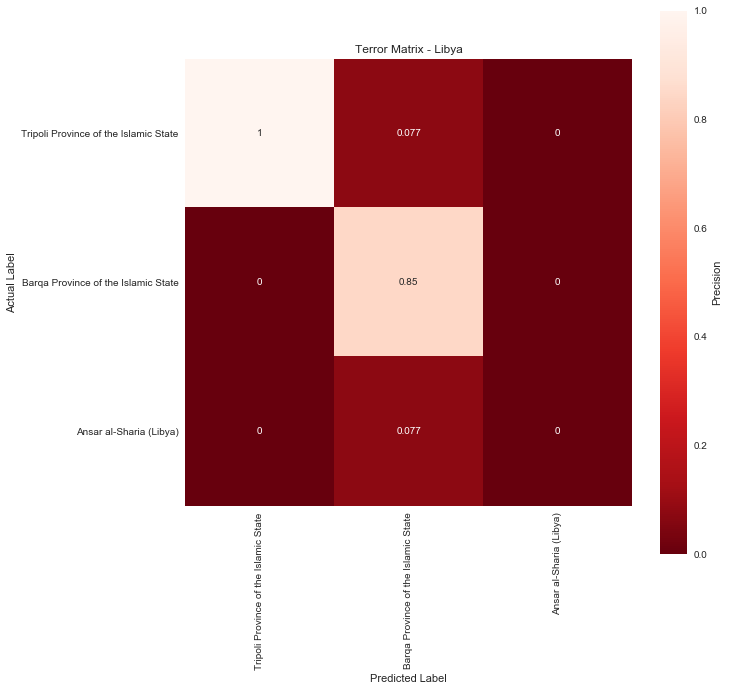

Unique Actual Classes: 5
Unique Predicted Classes: 6
Total Test Observations: 577


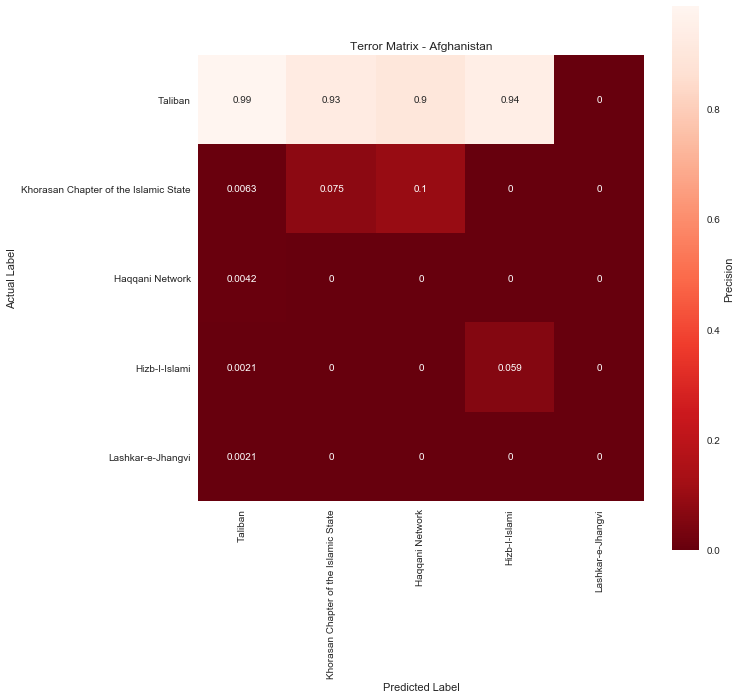

In [243]:
create_hm(X9_test, y9_test, cm9, 'Libya')
create_hm(X10_test, y10_test, cm10, 'Afghanistan')

In [230]:
train10['gname'].value_counts()

Taliban                                                         1695
Islamic State of Iraq and the Levant (ISIL)                      705
Boko Haram                                                       344
Al-Shabaab                                                       343
Tehrik-i-Taliban Pakistan (TTP)                                  292
Maoists                                                          248
Communist Party of India - Maoist (CPI-Maoist)                   174
Al-Qaida in Iraq                                                 159
Kurdistan Workers' Party (PKK)                                   135
New People's Army (NPA)                                          134
Al-Qaida in the Arabian Peninsula (AQAP)                         126
Fulani extremists                                                 87
Revolutionary Armed Forces of Colombia (FARC)                     82
Houthi extremists (Ansar Allah)                                   81
Sinai Province of the Islamic Stat